<h1> test COVID 19 </h1>


In [97]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
country ="Iran"

In [99]:
#!dir *.csv

In [100]:
#build DF
df = pd.read_csv("iranCovid20000323.csv")

print(df.head())
df.shape

   Unnamed: 0  day  cases
0           0    1      2
1           1    2      5
2           2    3     18
3           3    4     29
4           4    5     43


(33, 3)

In [101]:
# building vectors
xs = df["day"]
ys = df["cases"]

In [102]:
#graph array and ML dependencies
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

In [103]:
# General Functions
def func_exp(x, a, b, c):
    """Return values from a general exponential function."""
    return a * np.exp(b * x) + c

def func_log(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c

In [104]:
#transformer obj, to transform to log
transformer = FunctionTransformer(np.log, validate=True)

In [105]:
#adjusting data arrays to shape for model fitting
xs = xs.values.reshape(-1,1)
ys = ys.values.reshape(-1,1)
#transform y values to log(y) for linear regression serving for exp or log fit
y_trans = transformer.fit_transform(ys)

In [106]:
#fit the model
model = LinearRegression().fit(xs, y_trans)  

In [107]:
#print the slope
coeff=model.coef_
coeff=np.exp(coeff)
print(coeff)

[[1.29600772]]


In [108]:
#get y_hat
y_fit = model.predict(xs)

Text(0.5, 1.0, 'COVID 19  model for Iran')

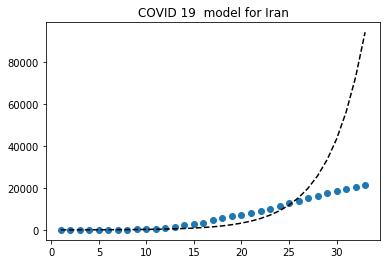

In [109]:
#graph
plt.scatter(xs, ys)
plt.plot(xs, np.exp(y_fit), "k--", label="Fit")     # 3
plt.title("COVID 19  model for "+country)

In [110]:
#show example of predicted value
np.exp(model.predict([[15]]))

array([[885.4475982]])

In [111]:
#predict function of easy prediction (dayNum)
def predict(day):
    return np.exp(model.predict(np.array([day]).reshape(-1,1)))[0][0]

In [112]:
for x in range(10,15):
    print("{:.0f} :  {:.1f}".format(x,predict(x) ) )

10 :  242.2
11 :  313.9
12 :  406.8
13 :  527.2
14 :  683.2


In [115]:
for i in range(12,30):
    print(str(i+1) + " " +str (ys[i][0]))

13 1501
14 2336
15 2922
16 3513
17 4747
18 5823
19 6566
20 7161
21 8042
22 9000
23 10075
24 11364
25 12729
26 13938
27 14991
28 16169
29 17361
30 18407


In [114]:
#compute average daily growth
def dailyGrowth (ys):   
    gs = []
    for i in range(1,len(ys)):
        g=  (ys[i]- ys[i-1])/ys[i-1]
        g = g[0]
        gs.append(g)
    return(gs)               
def avgDailyGrowth(ys):
    return np.mean(dailyGrowth(ys))

avgDailyGrowth(ys)


0.3954046179418525